In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings("ignore")


In [5]:
df = pd.read_csv("insurance_claims.csv")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [8]:
df.shape

(1000, 39)

In [10]:
df.isnull().sum()

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

In [12]:
df.describe(include="all")

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.000000,1.000000e+03,1000.000000,...,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000
unique,NaN,NaN,NaN,951,3,3,NaN,NaN,NaN,NaN,...,NaN,3,NaN,NaN,NaN,NaN,14,39,NaN,2
top,NaN,NaN,NaN,01-01-2006,OH,250/500,NaN,NaN,NaN,NaN,...,NaN,?,NaN,NaN,NaN,NaN,Saab,RAM,NaN,N
freq,NaN,NaN,NaN,3,352,351,NaN,NaN,NaN,NaN,...,NaN,343,NaN,NaN,NaN,NaN,80,43,NaN,753
mean,203.954000,38.948000,546238.648000,NaN,NaN,NaN,1136.000000,1256.406150,1.101000e+06,501214.488000,...,1.487000,NaN,52761.94000,7433.420000,7399.570000,37928.950000,NaN,NaN,2005.103000,NaN
std,115.113174,9.140287,257063.005276,NaN,NaN,NaN,611.864673,244.167395,2.297407e+06,71701.610941,...,1.111335,NaN,26401.53319,4880.951853,4824.726179,18886.252893,NaN,NaN,6.015861,NaN
min,0.000000,19.000000,100804.000000,NaN,NaN,NaN,500.000000,433.330000,-1.000000e+06,430104.000000,...,0.000000,NaN,100.00000,0.000000,0.000000,70.000000,NaN,NaN,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,NaN,NaN,NaN,500.000000,1089.607500,0.000000e+00,448404.500000,...,1.000000,NaN,41812.50000,4295.000000,4445.000000,30292.500000,NaN,NaN,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,NaN,NaN,NaN,1000.000000,1257.200000,0.000000e+00,466445.500000,...,1.000000,NaN,58055.00000,6775.000000,6750.000000,42100.000000,NaN,NaN,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,NaN,NaN,NaN,2000.000000,1415.695000,0.000000e+00,603251.000000,...,2.000000,NaN,70592.50000,11305.000000,10885.000000,50822.500000,NaN,NaN,2010.000000,NaN


In [6]:
# Check missing values
df.isnull().sum()

# Specifically check authorities_contacted
print(df['authorities_contacted'].value_counts(dropna=False))

# Option: Fill missing with "Unknown"
df['authorities_contacted'] = df['authorities_contacted'].fillna("Unknown")

authorities_contacted
Police       292
Fire         223
Other        198
Ambulance    196
NaN           91
Name: count, dtype: int64


In [7]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'], errors='coerce')
df['incident_date'] = pd.to_datetime(df['incident_date'], errors='coerce')

# Check categorical vs numeric
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['int64','float64']).columns

print("Categorical:", cat_cols)
print("Numerical:", num_cols)


Categorical: Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model', 'fraud_reported'],
      dtype='object')
Numerical: Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year'],
      dtype='object')


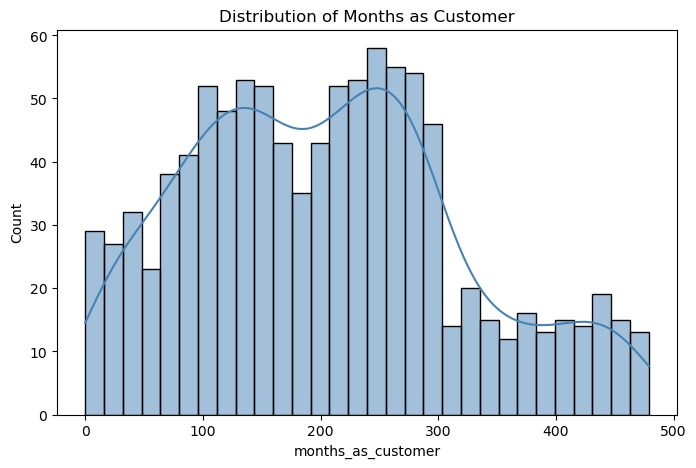

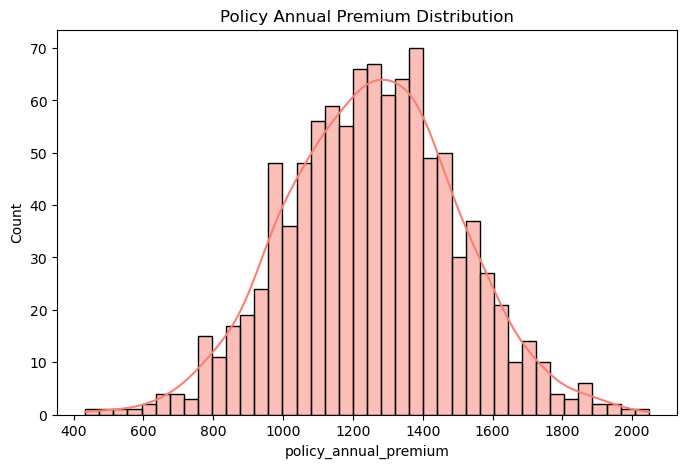

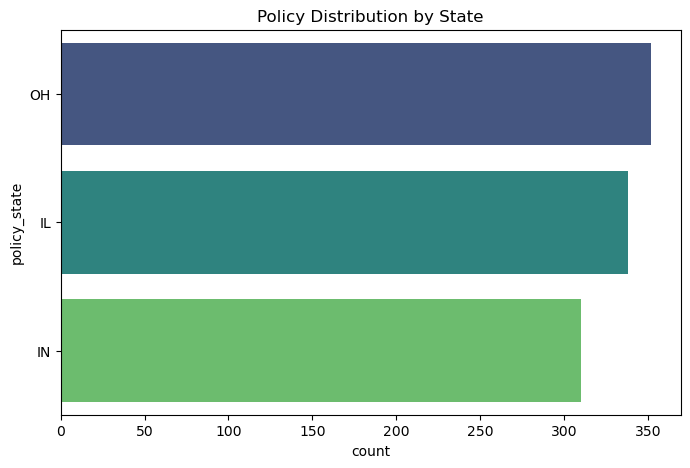

In [8]:
# Distribution of months as customer
plt.figure(figsize=(8,5))
sns.histplot(df['months_as_customer'], bins=30, kde=True, color="steelblue")
plt.title("Distribution of Months as Customer")
plt.show()

# Annual premium distribution
plt.figure(figsize=(8,5))
sns.histplot(df['policy_annual_premium'], bins=40, kde=True, color="salmon")
plt.title("Policy Annual Premium Distribution")
plt.show()

# Policy distribution by state
plt.figure(figsize=(8,5))
sns.countplot(y="policy_state", data=df, order=df['policy_state'].value_counts().index, palette="viridis")
plt.title("Policy Distribution by State")
plt.show()


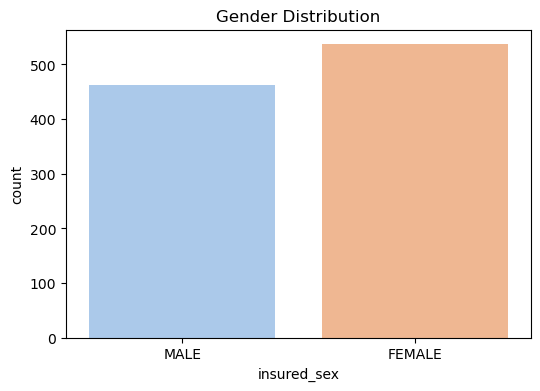

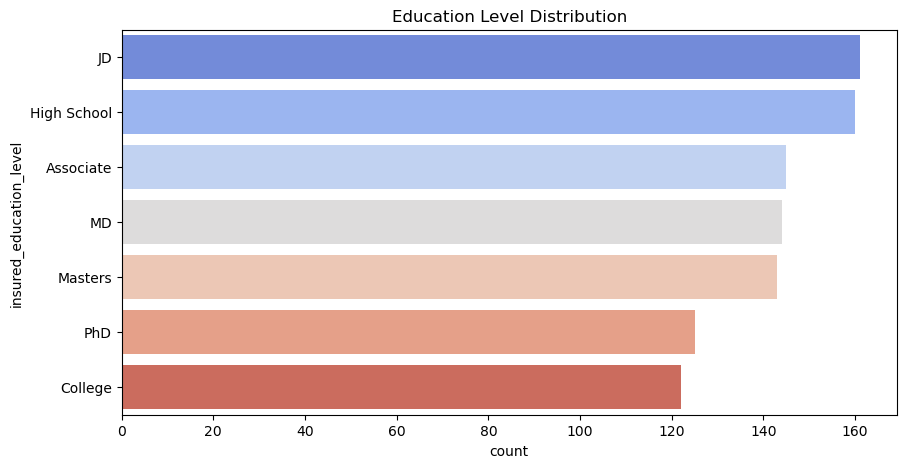

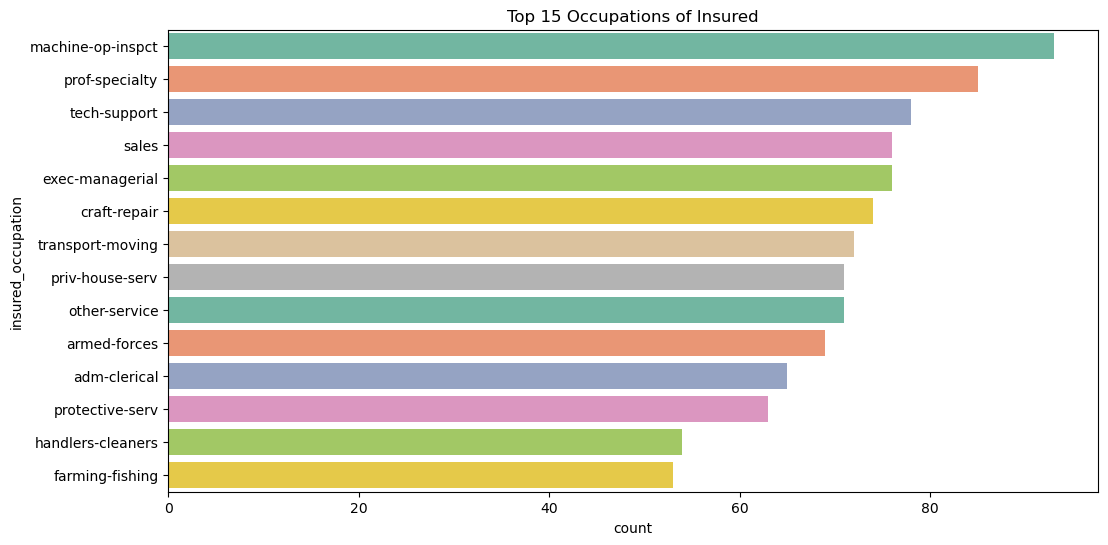

In [44]:
# Gender distribution
plt.figure(figsize=(6,4))
sns.countplot(x="insured_sex", data=df, palette="pastel")
plt.title("Gender Distribution")
plt.show()

# Education distribution
plt.figure(figsize=(10,5))
sns.countplot(y="insured_education_level", data=df, order=df['insured_education_level'].value_counts().index, palette="coolwarm")
plt.title("Education Level Distribution")
plt.show()

# Occupation distribution (Top 15)
plt.figure(figsize=(12,6))
sns.countplot(y="insured_occupation", data=df, order=df['insured_occupation'].value_counts().head(15).index, palette="Set2")
plt.title("Top 15 Occupations of Insured")
plt.show()


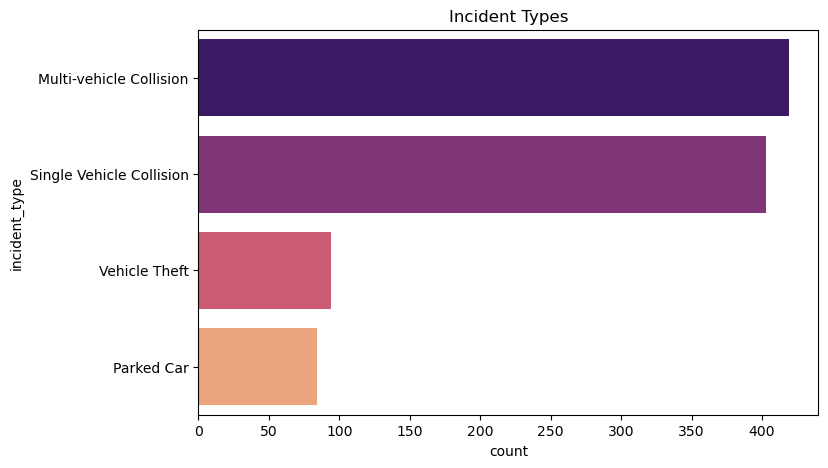

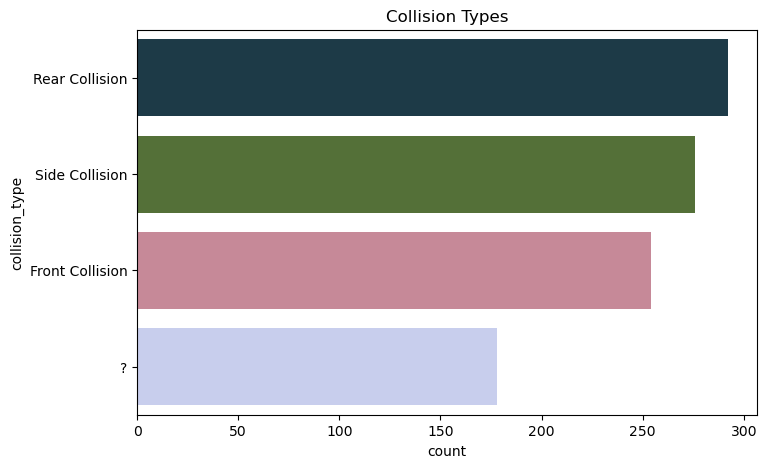

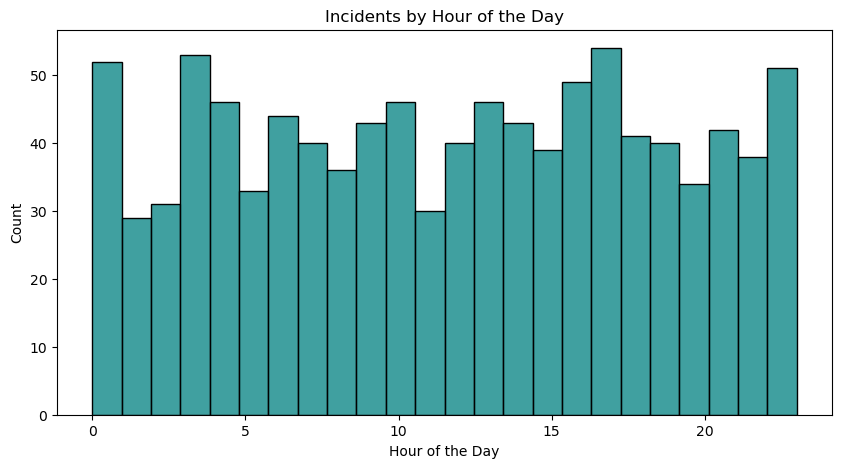

In [45]:
# Incident types
plt.figure(figsize=(8,5))
sns.countplot(y="incident_type", data=df, order=df['incident_type'].value_counts().index, palette="magma")
plt.title("Incident Types")
plt.show()

# Collision types
plt.figure(figsize=(8,5))
sns.countplot(y="collision_type", data=df, order=df['collision_type'].value_counts().index, palette="cubehelix")
plt.title("Collision Types")
plt.show()

# Incidents by hour of the day
plt.figure(figsize=(10,5))
sns.histplot(df['incident_hour_of_the_day'], bins=24, kde=False, color="teal")
plt.title("Incidents by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.show()


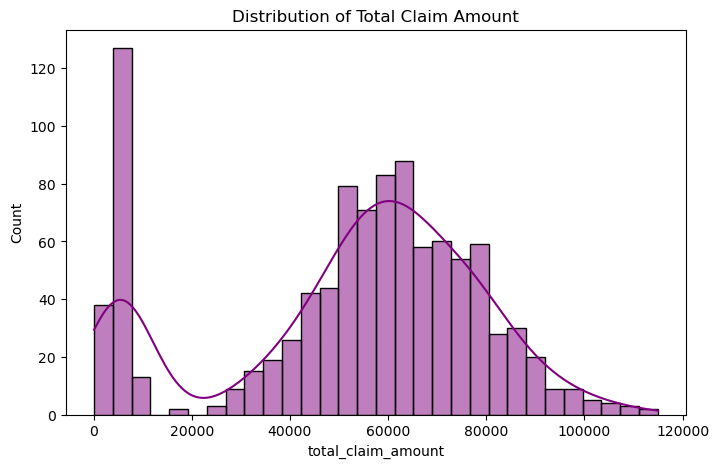

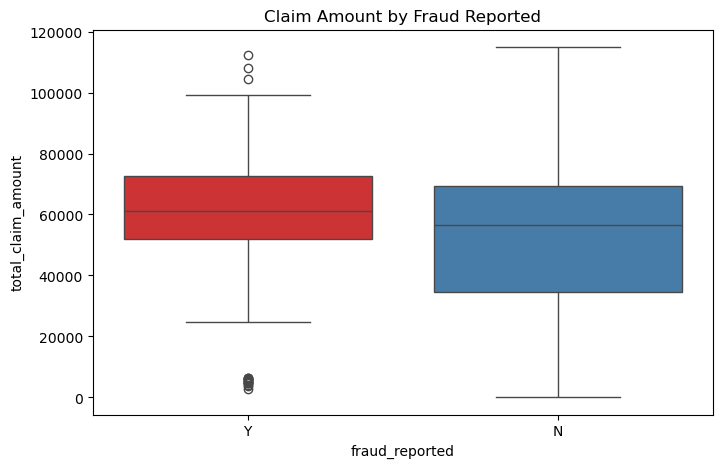

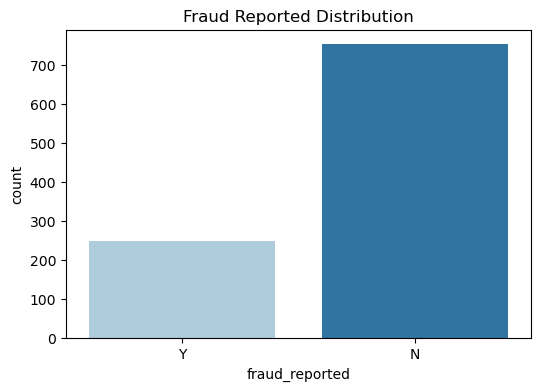

In [46]:
# Distribution of total claim amount
plt.figure(figsize=(8,5))
sns.histplot(df['total_claim_amount'], bins=30, kde=True, color="purple")
plt.title("Distribution of Total Claim Amount")
plt.show()

# Claim amount by fraud
plt.figure(figsize=(8,5))
sns.boxplot(x="fraud_reported", y="total_claim_amount", data=df, palette="Set1")
plt.title("Claim Amount by Fraud Reported")
plt.show()

# Fraud reported distribution
plt.figure(figsize=(6,4))
sns.countplot(x="fraud_reported", data=df, palette="Paired")
plt.title("Fraud Reported Distribution")
plt.show()


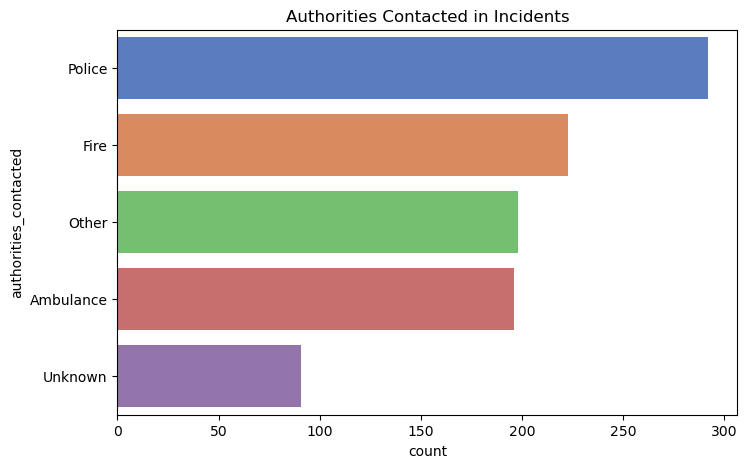

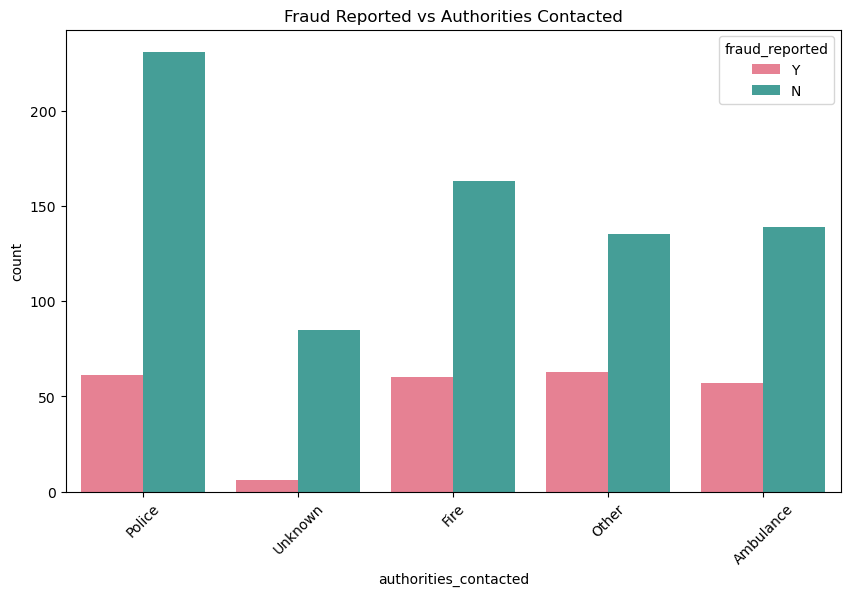

In [47]:
# Authorities contacted
plt.figure(figsize=(8,5))
sns.countplot(y="authorities_contacted", data=df, order=df['authorities_contacted'].value_counts().index, palette="muted")
plt.title("Authorities Contacted in Incidents")
plt.show()

# Fraud vs Authorities contacted
plt.figure(figsize=(10,6))
sns.countplot(x="authorities_contacted", hue="fraud_reported", data=df, palette="husl")
plt.title("Fraud Reported vs Authorities Contacted")
plt.xticks(rotation=45)
plt.show()


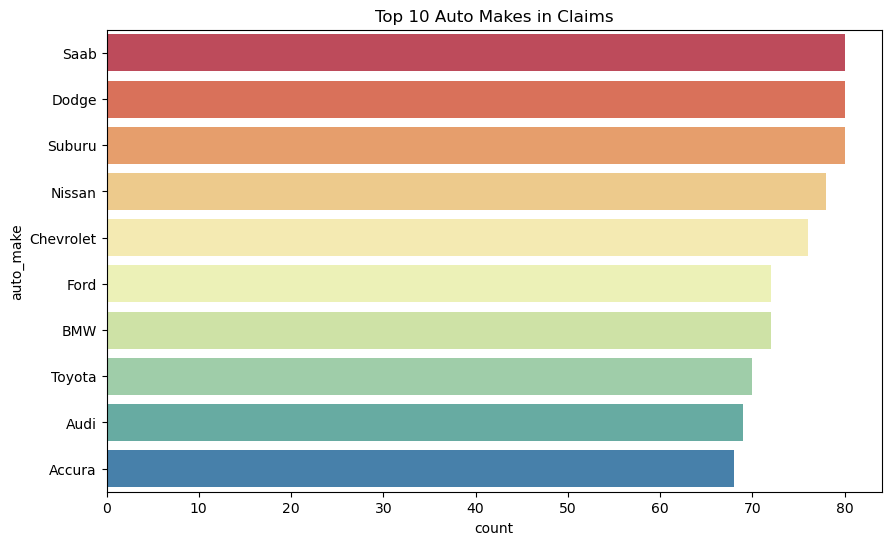

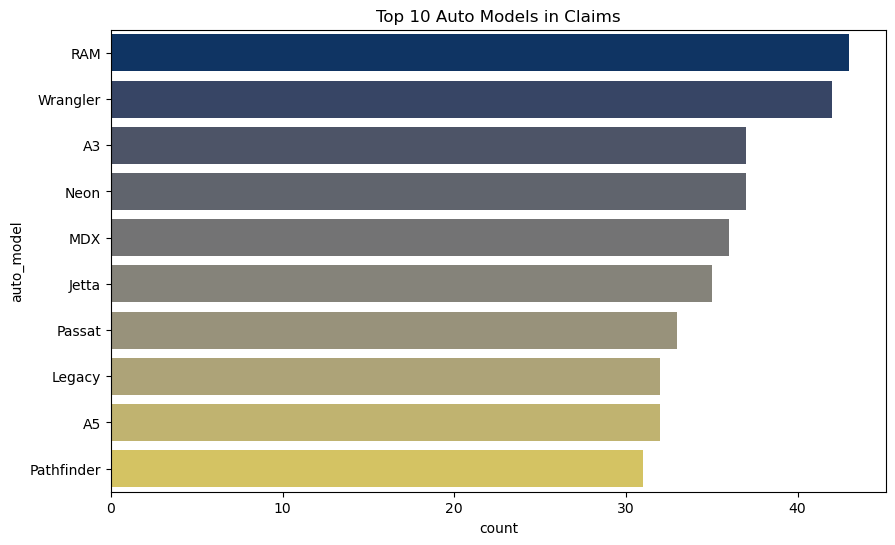

In [48]:
# Top Auto Makes
plt.figure(figsize=(10,6))
sns.countplot(y="auto_make", data=df, order=df['auto_make'].value_counts().head(10).index, palette="Spectral")
plt.title("Top 10 Auto Makes in Claims")
plt.show()

# Top Auto Models
plt.figure(figsize=(10,6))
sns.countplot(y="auto_model", data=df, order=df['auto_model'].value_counts().head(10).index, palette="cividis")
plt.title("Top 10 Auto Models in Claims")
plt.show()


In [9]:
#for building the powebi dashboard
df.to_csv("cleaned_insurance_claims.csv", index=False)
